<h4>Import libraries</h4>

In [28]:
import os
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing     import StandardScaler, MinMaxScaler
from sklearn.model_selection   import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.spatial             import distance
from sklearn.cluster           import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets          import load_iris, make_moons
from sklearn.metrics           import silhouette_score, pairwise_distances

<h5>house keeping params</h5>

In [16]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.1
N_SAMPLES = 1000
ALPHA = 0.001

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x700 with 0 Axes>

<h4></h4>

<h4>Get some data too</h4>

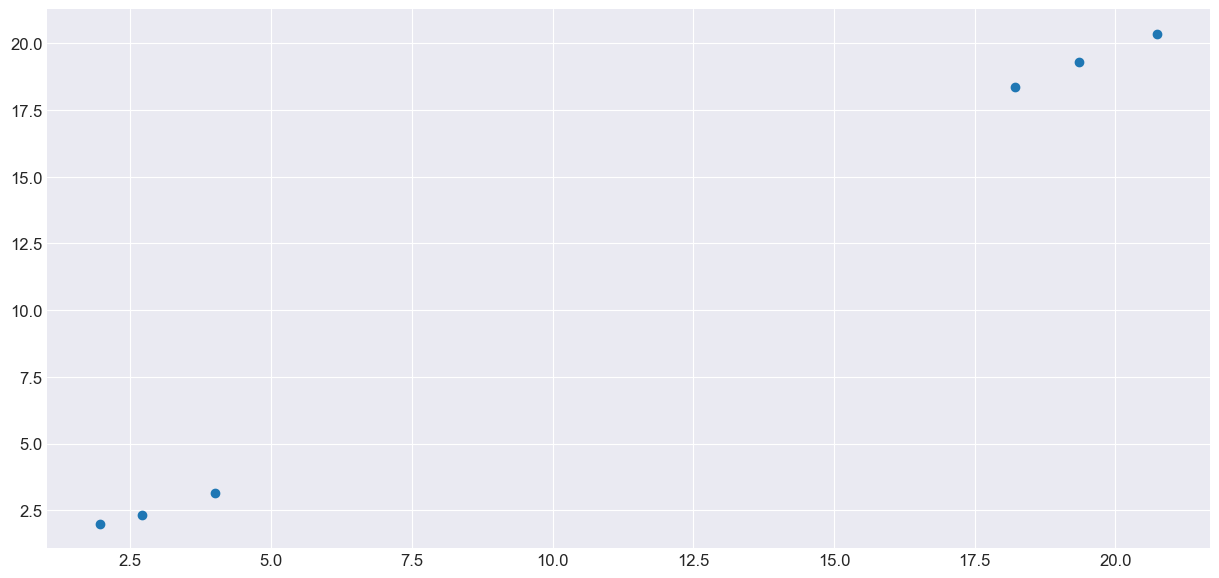

In [20]:
rnd = np.random.RandomState(RANDOM_STATE)

x_axis = np.array([1,2,3,18,19,20]) + rnd.uniform(0,1, size = 6)
y_axis = np.array([1,2,3,18,19,20]) + rnd.uniform(0,1, size = 6)

data_df = pd.DataFrame({'x': x_axis, 'y':y_axis})
plt.scatter(x_axis, y_axis);

AttributeError: module 'scipy.cluster.hierarchy' has no attribute 'linkages'

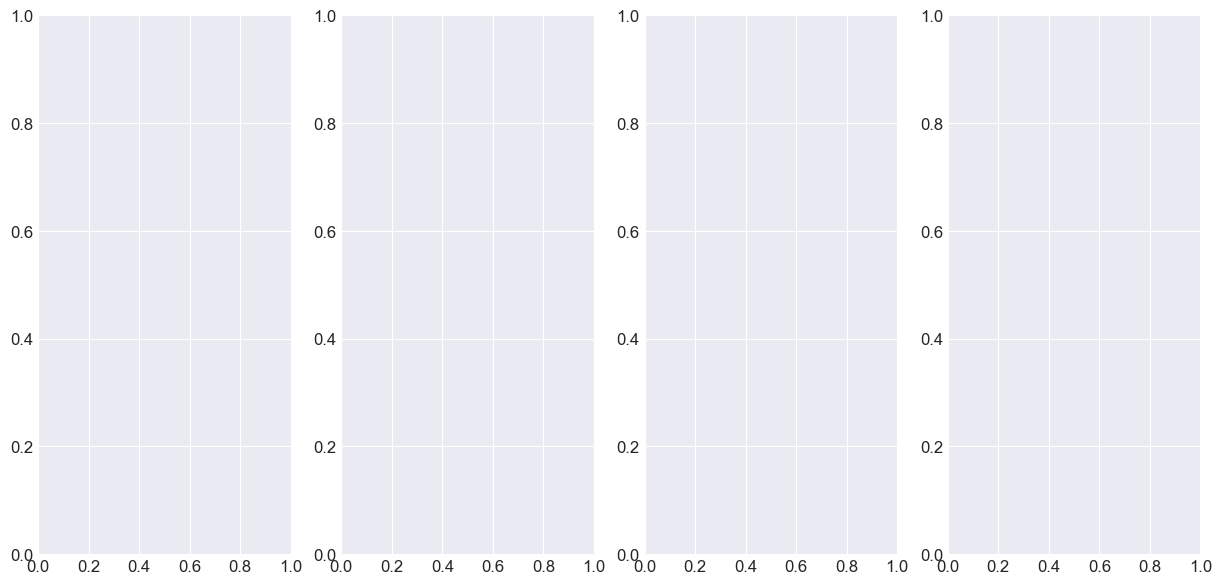

In [22]:
fig, axes =plt.subplots(1,4)

#finding centroid by median

Z_median = sch.linkages()